<a href="https://colab.research.google.com/github/prateeksha112/coding/blob/main/combination_of_all_3_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

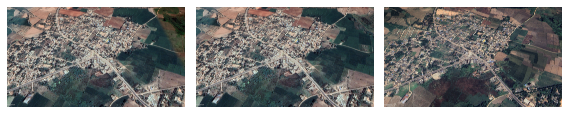

In [ ]:
from skimage import io
img1=io.imread("/content/1.jpg")
img2=io.imread("/content/2.jpg")
img3=io.imread("/content/3.jpg")
fig,axes=plt.subplots(1,3, figsize=(8,3))
axes[0].imshow(img1)
axes[1].imshow(img2)
axes[2].imshow(img3)
for a in axes:
  a.axis("off")
plt.tight_layout()


In [ ]:
from skimage.exposure import histogram

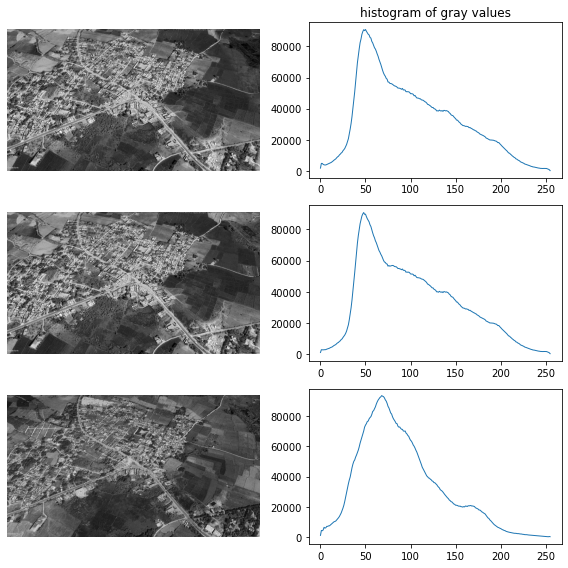

In [ ]:
gray_image1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray_image2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray_image3=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
hist1, hist_centers1=histogram(gray_image1)
hist2, hist_centers2=histogram(gray_image2)
hist3, hist_centers3=histogram(gray_image3)
fig, axes = plt.subplots(3, 2, figsize=(8, 8)) 
axes[0, 0].imshow(gray_image1, cmap=plt.cm.gray)
axes[0, 0].axis('off')
axes[0, 1].plot(hist_centers1, hist1, lw=1)
axes[0, 1].set_title('histogram of gray values')
axes[1, 0].imshow(gray_image2, cmap=plt.cm.gray)
axes[1, 0].axis("off")
axes[1, 1].plot(hist_centers2, hist2, lw=1)
axes[2, 0].imshow(gray_image3, cmap=plt.cm.gray)
axes[2, 0].axis("off")
axes[2, 1].plot(hist_centers3, hist3, lw=1)
plt.tight_layout()


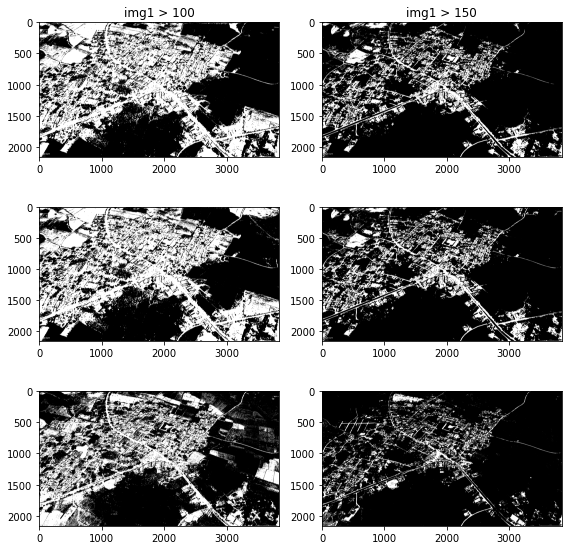

In [ ]:
fig, axes = plt.subplots(3,2, figsize = (8,8))
axes[0, 0].imshow(gray_image1 > 100, cmap=plt.cm.gray)
axes[0, 0].set_title('img1 > 100')
axes[0, 1].imshow(gray_image1 > 150, cmap=plt.cm.gray)
axes[0, 1].set_title('img1 > 150')
axes[1, 0].imshow(gray_image2 > 100, cmap=plt.cm.gray)
axes[1, 1].imshow(gray_image2 > 150, cmap=plt.cm.gray)
axes[2, 0].imshow(gray_image3 > 100, cmap=plt.cm.gray)
axes[2, 1].imshow(gray_image3 > 150, cmap=plt.cm.gray)

# for a in axes.flatten():
#     a.axis('off')

plt.tight_layout()

In [ ]:
# import matplotlib.patches as patches
# # Create a figure and axes
# fig, ax = plt.subplots(1)

# # Display the image
# ax.imshow(gray_image2)
# #Define the region of interest (ROI)
# x, y, w, h = 1100, 1100, 1100, 1100

# # Create a rectangle patch to highlight the ROI
# rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
# ax.add_patch(rect)

# # Zoom in on the ROI
# ax.set_xlim(x,x+w)
# ax.set_ylim(y+h,y)
# ax.set_xticks([])
# ax.set_yticks([])
# hist1, hist_centers1=histogram(rect)
# plt.plot(hist_centers1, hist1)

x1, y1, x2, y2 = 1000, 1000, 500, 500 # coordinates of top-left and bottom-right corners
pixels = list(gray_image2((x1, y1, x2, y2)).getdata())

# Plot a histogram of the pixel values
plt.hist(pixels)
plt.show()

TypeError: ignored

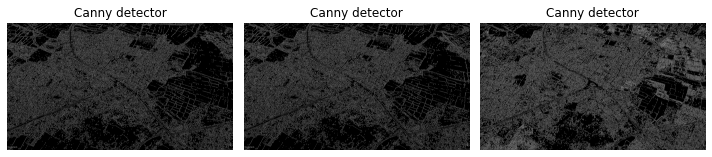

In [ ]:
from skimage.feature import canny

edges1 = canny(gray_image1)
edges2 = canny(gray_image2)
edges3 = canny(gray_image3)

fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].imshow(edges1, cmap=plt.cm.gray)
ax[0].set_title('Canny detector')
ax[0].axis('off')
ax[1].imshow(edges2, cmap=plt.cm.gray)
ax[1].set_title('Canny detector')
ax[1].axis('off')
ax[2].imshow(edges3, cmap=plt.cm.gray)
ax[2].set_title('Canny detector')
ax[2].axis('off')
plt.tight_layout()


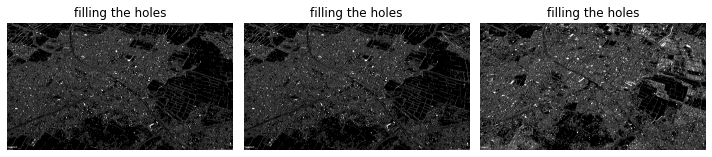

In [ ]:
from scipy import ndimage as ndi

fill_gray_image1 = ndi.binary_fill_holes(edges1)
fill_gray_image2 = ndi.binary_fill_holes(edges2)
fill_gray_image3 = ndi.binary_fill_holes(edges3)

fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes[0].imshow(fill_gray_image1, cmap=plt.cm.gray)
axes[0].set_title('filling the holes')
axes[0].axis('off')

axes[1].imshow(fill_gray_image2, cmap=plt.cm.gray)
axes[1].set_title('filling the holes')
axes[1].axis('off')

axes[2].imshow(fill_gray_image3, cmap=plt.cm.gray)
axes[2].set_title('filling the holes')
axes[2].axis('off')

plt.tight_layout()
plt.show()



(-0.5, 3839.5, 2159.5, -0.5)

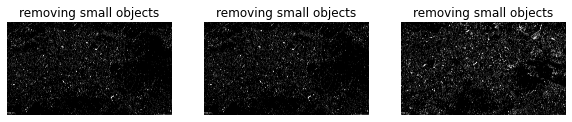

In [ ]:
from skimage import morphology

image_cleaned1 = morphology.remove_small_objects(fill_gray_image1, 21)
image_cleaned2 = morphology.remove_small_objects(fill_gray_image2, 21)
image_cleaned3 = morphology.remove_small_objects(fill_gray_image3, 21)

fig, ax = plt.subplots(1, 3, figsize=(10, 7))
ax[0].imshow(image_cleaned1, cmap=plt.cm.gray)
ax[0].set_title('removing small objects')
ax[0].axis('off')
ax[1].imshow(image_cleaned2, cmap=plt.cm.gray)
ax[1].set_title('removing small objects')
ax[1].axis('off')
ax[2].imshow(image_cleaned3, cmap=plt.cm.gray)
ax[2].set_title('removing small objects')
ax[2].axis('off')

(-0.5, 3839.5, 2159.5, -0.5)

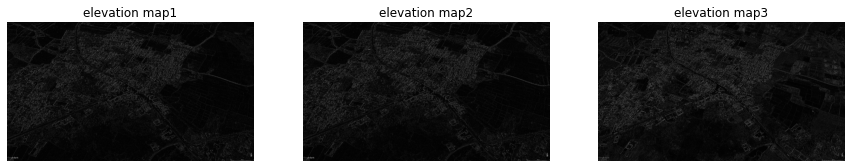

In [ ]:
from skimage.filters import sobel

elevation_map1 = sobel(gray_image1)
elevation_map2 = sobel(gray_image2)
elevation_map3 = sobel(gray_image3)


fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(elevation_map1, cmap=plt.cm.gray)
ax[0].set_title('elevation map1')
ax[0].axis('off')
ax[1].imshow(elevation_map2, cmap=plt.cm.gray)
ax[1].set_title('elevation map2')
ax[1].axis('off')
ax[2].imshow(elevation_map3, cmap=plt.cm.gray)
ax[2].set_title('elevation map3')
ax[2].axis('off')

(-0.5, 3839.5, 2159.5, -0.5)

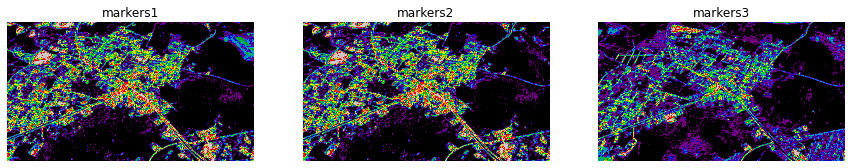

In [ ]:
markers1 = np.zeros_like(gray_image1)
markers1[gray_image1 < 30] = 1
markers1[gray_image1 > 150] = 2
markers2 = np.zeros_like(gray_image2)
markers2[gray_image2 < 30] = 1
markers2[gray_image2 > 150] = 2
markers3 = np.zeros_like(gray_image3)
markers3[gray_image3 < 30] = 1
markers3[gray_image3 > 150] = 2

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(markers1, cmap=plt.cm.nipy_spectral)
ax[0].set_title('markers1')
ax[0].axis('off')
ax[1].imshow(markers2, cmap=plt.cm.nipy_spectral)
ax[1].set_title('markers2')
ax[1].axis('off')
ax[2].imshow(markers3, cmap=plt.cm.nipy_spectral)
ax[2].set_title('markers3')
ax[2].axis('off')

(-0.5, 3839.5, 2159.5, -0.5)

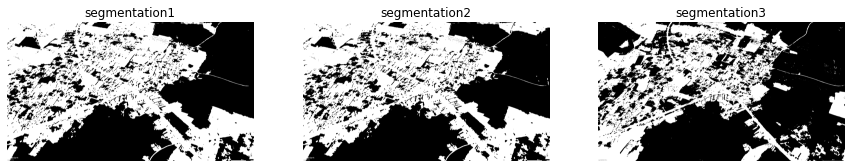

In [ ]:
from skimage import segmentation

segmentation_gray_image1 = segmentation.watershed(elevation_map1, markers1)
segmentation_gray_image2 = segmentation.watershed(elevation_map2, markers2)
segmentation_gray_image3 = segmentation.watershed(elevation_map3, markers3)

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(segmentation_gray_image1, cmap=plt.cm.gray)
ax[0].set_title('segmentation1')
ax[0].axis('off')
ax[1].imshow(segmentation_gray_image2, cmap=plt.cm.gray)
ax[1].set_title('segmentation2')
ax[1].axis('off')
ax[2].imshow(segmentation_gray_image3, cmap=plt.cm.gray)
ax[2].set_title('segmentation3')
ax[2].axis('off')

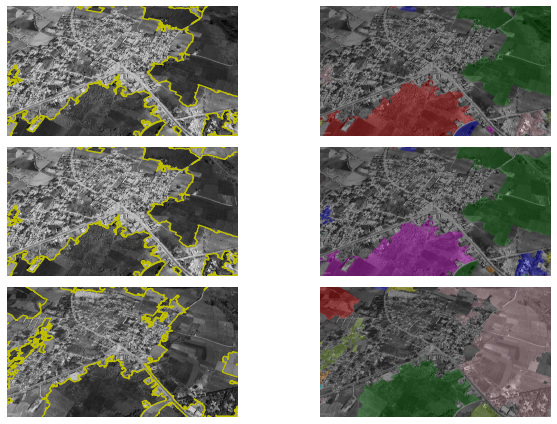

In [ ]:
from skimage.color import label2rgb

segmentation_gray_image1 = ndi.binary_fill_holes(segmentation_gray_image1 - 1)
labeled_gray_image1, _ = ndi.label(segmentation_gray_image1)
image_label_overlay1 = label2rgb(labeled_gray_image1, image=gray_image1, bg_label=0)
segmentation_gray_image2 = ndi.binary_fill_holes(segmentation_gray_image2 - 1)
labeled_gray_image2, _ = ndi.label(segmentation_gray_image2)
image_label_overlay2 = label2rgb(labeled_gray_image2, image=gray_image2, bg_label=0)
segmentation_gray_image3 = ndi.binary_fill_holes(segmentation_gray_image3 - 1)
labeled_gray_image3, _ = ndi.label(segmentation_gray_image3)
image_label_overlay3 = label2rgb(labeled_gray_image3, image=gray_image3, bg_label=0)


fig, axes = plt.subplots(3, 2, figsize=(10, 6), sharey=True)
axes[0,0].imshow(gray_image1, cmap=plt.cm.gray)
axes[0,0].contour(segmentation_gray_image1, [0.5], linewidths=1.2, colors='y')
axes[0,1].imshow(image_label_overlay1)
axes[1,0].imshow(gray_image2, cmap=plt.cm.gray)
axes[1,0].contour(segmentation_gray_image2, [0.5], linewidths=1.2, colors='y')
axes[1,1].imshow(image_label_overlay2)
axes[2,0].imshow(gray_image3, cmap=plt.cm.gray)
axes[2,0].contour(segmentation_gray_image3, [0.5], linewidths=1.2, colors='y')
axes[2,1].imshow(image_label_overlay3)

for a in axes.flatten():
    a.axis('off')

plt.tight_layout()

plt.show()